# Notebook — Tâche 2 : Exploration & Analyse
Objectif: Cette tâche vise à transformer un dataset consolidé en un support d’analyse riche et pertinent, en combinant rigueur statistique, créativité analytique et préparation pour un usage décisionnel (Power BI).

In [3]:
#1
# Cette cellule initialise l’environnement de travail :
# - importe les bibliothèques nécessaires
# - configure les chemins vers les fichiers produits à la Tâche 1
# - définit des fonctions utilitaires (aperçu rapide, tracés simples)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Markdown

# --- Style et affichage ---
plt.style.use("seaborn-v0_8-whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

# --- Définition du chemin principal ---
BASE = Path("/Users/davidakpovi/challenge_tache1_ANIP")
PROCESSED = BASE / "data" / "processed"

CORE_PATH = PROCESSED / "dataset_final_core.csv"
FULL_PATH = PROCESSED / "dataset_final.csv"

print("=== CONFIGURATION TÂCHE 2 ===")
print("BASE:", BASE)
print("CORE_PATH exists:", CORE_PATH.exists())
print("FULL_PATH exists:", FULL_PATH.exists())

# --- Fonctions utilitaires de base ---
def quick_info(df, name="DataFrame"):
    """Affiche les informations principales d’un DataFrame (forme, colonnes, NA)."""
    print(f"\n=== Aperçu de {name} ===")
    print("Shape:", df.shape)
    print("Colonnes:", list(df.columns))
    display(df.head(3))
    print("\nTaux de valeurs manquantes (%):")
    display((df.isna().mean() * 100).round(1).rename("% NA"))
    print("-" * 60)

def plot_line(df, x, y, title="", ylabel=""):
    """Trace une courbe temporelle simple (vérifie la présence des colonnes nécessaires)."""
    if {x, y}.issubset(df.columns):
        tmp = df[[x, y]].dropna().drop_duplicates(x).sort_values(x)
        if not tmp.empty:
            plt.figure(figsize=(8, 4))
            plt.plot(tmp[x], tmp[y], marker="o")
            plt.title(title)
            plt.xlabel(x)
            plt.ylabel(ylabel)
            plt.tight_layout()
            plt.show()
        else:
            print(f"[INFO] Aucune donnée exploitable pour {y}.")
    else:
        print(f"[WARN] Colonnes {x} ou {y} manquantes dans le DataFrame.")

print("\n Bibliothèques et fonctions prêtes pour la Tâche 2 (Exploration & Analyse).")


=== CONFIGURATION TÂCHE 2 ===
BASE: /Users/davidakpovi/challenge_tache1_ANIP
CORE_PATH exists: True
FULL_PATH exists: True

 Bibliothèques et fonctions prêtes pour la Tâche 2 (Exploration & Analyse).


In [4]:
# 2
#Chargement des données consolidées
# Objectif :
#   - Charger le dataset final produit lors de la Tâche 1.
#   - Donner la priorité au fichier "core" (plus léger et standardisé),
#     et utiliser le fichier "full" en secours si le premier n’existe pas.
# Détails :
#   - Lecture du fichier CSV via `pandas.read_csv()`.
#   - Si aucun fichier n’est trouvé dans `data/processed/`, 
#     une erreur explicite est levée pour rappeler d’exécuter la Tâche 1.
# Sorties :
#   - Variable `df` : DataFrame principale utilisée pour toute l’analyse exploratoire.
#   - Variable `source_used` : indique si les données proviennent du "core" ou du "full".
#   - Affichage :
#       * Dimensions du tableau (`shape`)
#       * Aperçu des 5 premières lignes
#       * Liste complète des colonnes disponibles

if CORE_PATH.exists():
    df = pd.read_csv(CORE_PATH)
    source_used = "core"
elif FULL_PATH.exists():
    df = pd.read_csv(FULL_PATH)
    source_used = "full"
else:
    raise FileNotFoundError("Aucun dataset final trouvé dans data/processed/. Exécutez d'abord la Tâche 1.")

print("Source utilisée:", source_used, "| shape:", df.shape)
display(df.head())
print("Colonnes:", df.columns.tolist())


Source utilisée: core | shape: (65, 7)


,iso3,year,population_total,gdp_current_usd,gdp_real_growth_pct,life_expectancy_years,maternal_mortality_ratio
0,BEN,1960,2517286,2.26e+08,NaN,38.77,NaN
1,BEN,1961,2559223,2.36e+08,3.14,39.23,NaN
2,BEN,1962,2604659,2.36e+08,-3.43,39.64,NaN
3,BEN,1963,2652908,2.54e+08,4.73,40.08,NaN
4,BEN,1964,2704003,2.70e+08,6.65,40.50,NaN


Colonnes: ['iso3', 'year', 'population_total', 'gdp_current_usd', 'gdp_real_growth_pct', 'life_expectancy_years', 'maternal_mortality_ratio']


In [5]:
# 3
#Analyse descriptive: dimensions, NA, plage d'années, stats
# Objectif :
#   Réaliser une première exploration du dataset afin de comprendre 
#   sa structure générale et détecter d’éventuels problèmes de qualité.
# Étapes réalisées :
#   1. Affiche la dimension du DataFrame (nb de lignes x nb de colonnes).
#   2. Si la colonne "year" existe, affiche la période temporelle couverte
#      (valeur minimale et maximale).
#   3. Calcule le pourcentage de valeurs manquantes (% NA) par colonne 
#      pour identifier les variables incomplètes.
#   4. Produit un résumé statistique global (`describe`) pour chaque variable :
#        - moyennes, écarts-types, min/max pour les colonnes numériques
#        - nombre de valeurs uniques et de valeurs manquantes pour les non-numériques.
# Intérêt :
#   Cette étape donne un aperçu rapide de la santé du jeu de données :
#   cohérence des années, couverture des variables, et repérage des
#   colonnes problématiques avant de passer à des analyses plus fines.

print("Dimensions:", df.shape)
if "year" in df.columns and df["year"].notna().any():
    print("Années couvertes:", int(df["year"].min()), "→", int(df["year"].max()))

na_pct = (df.isna().mean()*100).round(1).rename("% NA")
display(na_pct)

desc = df.describe(include="all").transpose()
display(desc)


Dimensions: (65, 7)
Années couvertes: 1960 → 2024


iso3                         0.0
year                         0.0
population_total             0.0
gdp_current_usd              0.0
gdp_real_growth_pct          1.5
life_expectancy_years        1.5
maternal_mortality_ratio    40.0
Name: % NA, dtype: float64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iso3,65,1,BEN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,65.0,NaN,NaN,NaN,1992.0,18.91,1960.0,1976.0,1992.0,2008.0,2024.0
population_total,65.0,NaN,NaN,NaN,6648023.94,3573330.81,2517286.0,3532196.0,5617844.0,9228466.0,14462724.0
gdp_current_usd,65.0,NaN,NaN,NaN,4964465606.59,5795991466.78,226195578.43,698408261.92,1959965330.15,9535345015.78,21482643720.27
gdp_real_growth_pct,64.0,NaN,NaN,NaN,3.95,3.04,-4.9,2.3,4.28,6.1,9.95
life_expectancy_years,64.0,NaN,NaN,NaN,51.78,6.93,38.77,45.82,53.79,58.14,60.77
maternal_mortality_ratio,39.0,NaN,NaN,NaN,606.18,94.36,501.0,541.5,586.0,610.0,910.0


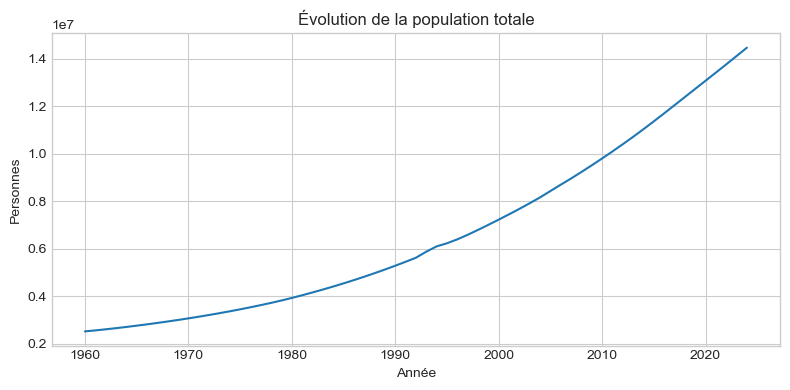

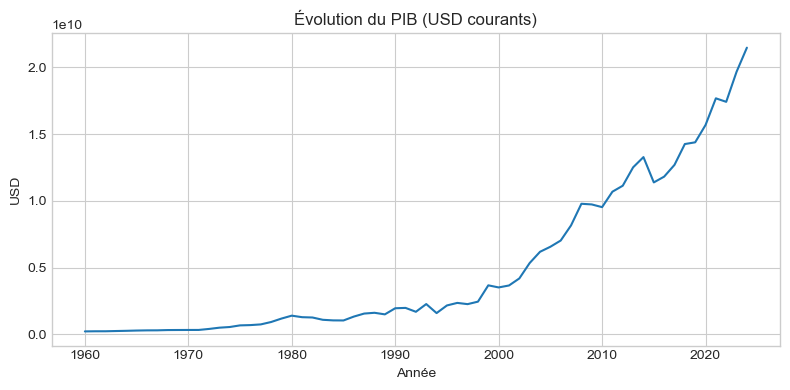

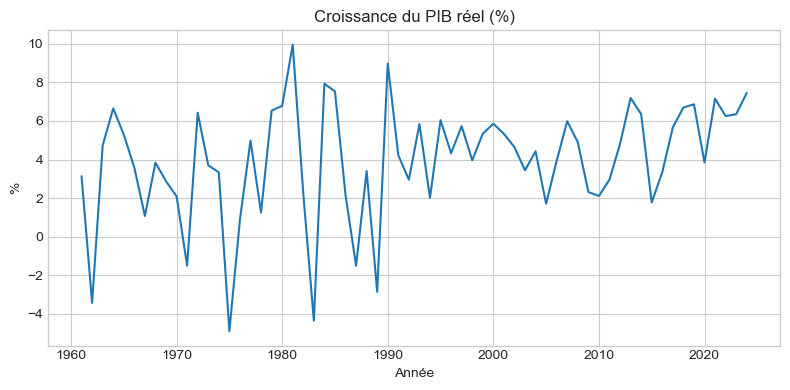

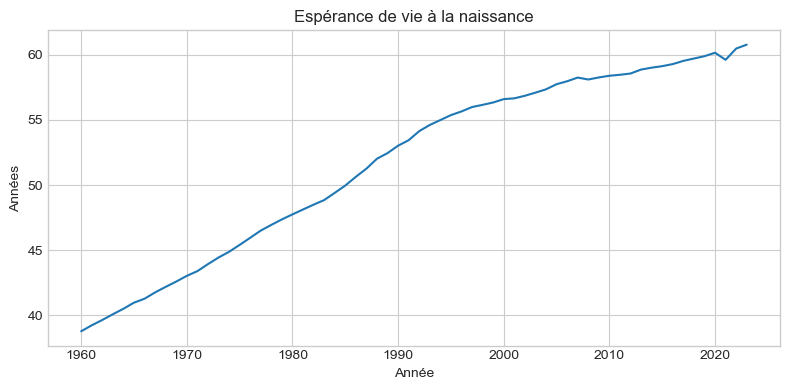

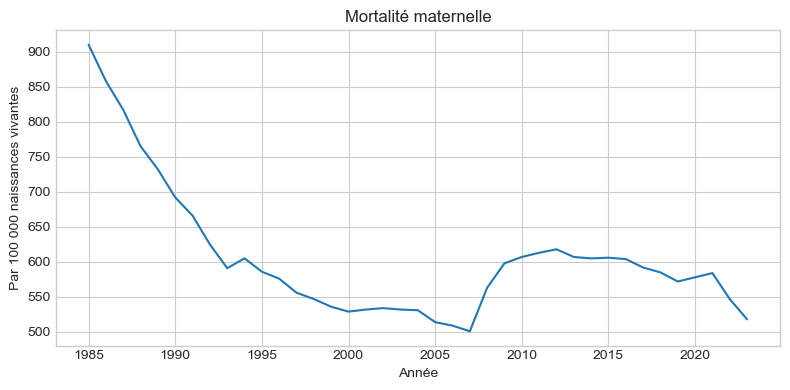

In [6]:
# 4
#Visualisations d'évolution: population, PIB, croissance, espérance de vie, mortalité maternelle
# Objectif :
#   Observer l’évolution dans le temps des indicateurs clés du développement
#   au Bénin entre 1960 et 2025.
# Étapes réalisées :
#   1. Définition d’une fonction utilitaire `line_if()` :
#       - Vérifie la présence des colonnes "year" et de la variable cible.
#       - Nettoie les doublons et valeurs manquantes.
#       - Trie les données par année.
#       - Produit un graphique linéaire (évolution temporelle).
#   2. Application de cette fonction à cinq indicateurs essentiels :
#        - population_total            → croissance démographique
#        - gdp_current_usd             → évolution du PIB en USD courants
#        - gdp_real_growth_pct         → taux de croissance du PIB réel
#        - life_expectancy_years       → progression de l’espérance de vie
#        - maternal_mortality_ratio    → évolution de la mortalité maternelle
# Intérêt :
#   Ces courbes permettent de visualiser les grandes tendances sur plusieurs décennies :
#     - la dynamique démographique,
#     - la performance économique,
#     - les progrès sanitaires,
#     - et les défis persistants en matière de santé maternelle.
#   C’est une étape clé pour poser les bases du storytelling et des analyses croisées
#   dans Power BI ou d’autres outils décisionnels.

def line_if(col, title, ylabel):
    if {"year", col}.issubset(df.columns):
        tmp = df[["year", col]].dropna().drop_duplicates("year").sort_values("year")
        if not tmp.empty:
            plt.figure(figsize=(8,4))
            plt.plot(tmp["year"], tmp[col])
            plt.title(title)
            plt.xlabel("Année")
            plt.ylabel(ylabel)
            plt.tight_layout()
            plt.show()

line_if("population_total",      "Évolution de la population totale", "Personnes")
line_if("gdp_current_usd",       "Évolution du PIB (USD courants)",   "USD")
line_if("gdp_real_growth_pct",   "Croissance du PIB réel (%)",        "%")
line_if("life_expectancy_years", "Espérance de vie à la naissance",   "Années")
line_if("maternal_mortality_ratio", "Mortalité maternelle",           "Par 100 000 naissances vivantes")


In [8]:
# 5
#Indicateurs dérivés: croissance population, PIB par habitant, indice composite simple
# Objectif :
#   - Enrichir le dataset avec de nouveaux indicateurs utiles à l’analyse socio-économique.
#   - Créer des variables dérivées à partir des données existantes pour révéler des tendances plus fines.
# Détails :
#   a) Croissance annuelle de la population :
#       -> Calculée comme le pourcentage de variation d’une année à l’autre.
#          Ex : (population_t - population_t-1) / population_t-1 * 100
#   b) PIB par habitant (gdp_per_capita_usd) :
#       -> Divise le PIB total par la population totale pour mesurer la richesse moyenne par individu.
#          Les valeurs infinies (division par zéro) sont remplacées par NaN pour éviter les erreurs.
#   c) Indice composite de développement (dev_index) :
#       -> Combine plusieurs dimensions (économie, santé, mortalité) via une normalisation Min-Max.
#       -> Les variables retenues sont :
#           - gdp_per_capita_usd : indicateur économique (plus haut = mieux)
#           - life_expectancy_years : indicateur sanitaire (plus haut = mieux)
#           - maternal_mortality_ratio : indicateur de santé inverse (plus bas = mieux, donc inversion)
#       -> La moyenne des valeurs normalisées produit un indice global entre 0 et 1.
# Sortie :
#   - DataFrame "enriched" contenant les nouvelles colonnes :
#       population_growth_pct, gdp_per_capita_usd, dev_index
#   - Aperçu affiché avec display(enriched.head())

enriched = df.copy()

# a) Croissance annuelle de la population (%)
if "population_total" in enriched.columns and "year" in enriched.columns:
    enriched = enriched.sort_values("year")
    enriched["population_growth_pct"] = enriched["population_total"].pct_change() * 100

# b) PIB par habitant (USD)
if {"gdp_current_usd","population_total"}.issubset(enriched.columns):
    enriched["gdp_per_capita_usd"] = (enriched["gdp_current_usd"] / enriched["population_total"]).replace([np.inf, -np.inf], np.nan)

# c) Indice composite (min-max) sur gdp_per_capita_usd, life_expectancy_years, maternal_mortality_ratio
from sklearn.preprocessing import MinMaxScaler

cols_index = [c for c in ["gdp_per_capita_usd","life_expectancy_years","maternal_mortality_ratio"] if c in enriched.columns]
if cols_index:
    scaler = MinMaxScaler()
    X = enriched[cols_index].copy()
    X_scaled = scaler.fit_transform(X.fillna(0))
    if "maternal_mortality_ratio" in cols_index:
        j = cols_index.index("maternal_mortality_ratio")
        X_scaled[:, j] = 1 - X_scaled[:, j]
    enriched["dev_index"] = X_scaled.mean(axis=1)

print("Variables ajoutées:", [c for c in enriched.columns if c not in df.columns])
display(enriched.head())


Variables ajoutées: ['population_growth_pct', 'gdp_per_capita_usd', 'dev_index']


,iso3,year,population_total,gdp_current_usd,gdp_real_growth_pct,life_expectancy_years,maternal_mortality_ratio,population_growth_pct,gdp_per_capita_usd,dev_index
0,BEN,1960,2517286,2.26e+08,NaN,38.77,NaN,NaN,89.86,0.55
1,BEN,1961,2559223,2.36e+08,3.14,39.23,NaN,1.67,92.09,0.55
2,BEN,1962,2604659,2.36e+08,-3.43,39.64,NaN,1.78,90.77,0.55
3,BEN,1963,2652908,2.54e+08,4.73,40.08,NaN,1.85,95.72,0.55
4,BEN,1964,2704003,2.70e+08,6.65,40.50,NaN,1.93,99.79,0.56


In [9]:
# 6
#Détection d'anomalies simples
# Objectif :
#   - Identifier les valeurs incohérentes ou suspectes dans le dataset enrichi avant visualisation finale.
#   - Créer un registre (anomalies_log) pour tracer et documenter les anomalies détectées.
# Détails :
#   La fonction `log_anomaly()` :
#       → Enregistre chaque anomalie détectée avec un label explicite
#         (ex: “Population <= 0”, “PIB négatif”, “Doublons iso3+year”, etc.)
#       → Ajoute un extrait du sous-ensemble concerné dans une liste globale pour inspection ultérieure.
# Contrôles effectués :
#   1. Population <= 0 :
#        - Cas théoriquement impossibles, à exclure ou corriger.
#   2. PIB (gdp_current_usd) < 0 :
#        - Indique une erreur de mesure ou une mauvaise conversion monétaire.
#   3. Taux de croissance de la population aberrant :
#        - Seuils retenus : > +50% ou < -20% d’une année sur l’autre.
#        - Sert à repérer les ruptures de série ou erreurs de saisie.
#   4. Doublons (iso3, year) :
#        - Vérifie l’unicité des couples pays–année pour éviter les duplications d’enregistrements.
# Sortie :
#   - Un journal `anomalies_log` listant les anomalies avec aperçu de leurs valeurs.
#   - Un affichage des 10 premières occurrences par type d’anomalie.
# Ce contrôle constitue la base du “rapport d’anomalies” exigé dans la Tâche 2.

anomalies_log = []

def log_anomaly(label, subset, cols_show):
    if subset is not None and not subset.empty:
        anomalies_log.append((label, subset[cols_show]))
        print(f"{label}: {subset.shape[0]} cas")

# population <= 0
if "population_total" in enriched.columns:
    bad = enriched[enriched["population_total"] <= 0]
    log_anomaly("Population <= 0", bad, ["iso3","year","population_total"])

# PIB < 0
if "gdp_current_usd" in enriched.columns:
    bad = enriched[enriched["gdp_current_usd"] < 0]
    log_anomaly("PIB négatif", bad, ["iso3","year","gdp_current_usd"])

# croissance pop aberrante
if "population_growth_pct" in enriched.columns:
    bad = enriched[(enriched["population_growth_pct"] > 50) | (enriched["population_growth_pct"] < -20)]
    log_anomaly("Croissance population aberrante (>50% ou <-20%)", bad, ["iso3","year","population_growth_pct"])

# doublons (iso3, year)
if {"iso3","year"}.issubset(enriched.columns):
    dup_n = enriched.duplicated(subset=["iso3","year"]).sum()
    if dup_n > 0:
        dup = enriched[enriched.duplicated(subset=["iso3","year"], keep=False)]
        log_anomaly("Doublons iso3+year", dup, ["iso3","year"])

# afficher un aperçu des anomalies
for label, tbl in anomalies_log:
    print("\n==", label, "==")
    display(tbl.head(10))


In [10]:
# 7
#Corrélations (numériques uniquement)
# Objectif :
#   - Identifier les relations linéaires entre les indicateurs du dataset enrichi.
#   - Déterminer quelles variables évoluent ensemble (corrélation positive)
#     ou de manière opposée (corrélation négative).
# Détails :
#   - `select_dtypes(include=[np.number])` filtre uniquement les colonnes numériques,
#      excluant les colonnes textuelles comme 'iso3' ou 'year'.
#   - `num.corr()` calcule la matrice de corrélation de Pearson entre toutes les variables numériques.
#   - L’affichage (`display(corr)`) produit une table symétrique de valeurs comprises entre :
#        +1  → corrélation parfaitement positive
#        -1  → corrélation parfaitement négative
#         0  → absence de relation linéaire
# Interprétation attendue :
#   - Une forte corrélation entre `gdp_per_capita_usd` et `life_expectancy_years`
#       suggère un lien entre prospérité économique et santé.
#   - Une corrélation négative entre `maternal_mortality_ratio` et le PIB ou l’espérance de vie
#       traduirait une amélioration des conditions de vie avec le développement économique.
# Sortie :
#   - Matrice de corrélation complète affichée dans le notebook,
#     base utile pour orienter les futures visualisations et indicateurs composites.

num = enriched.select_dtypes(include=[np.number])
if not num.empty:
    corr = num.corr()
    display(corr)


,year,population_total,gdp_current_usd,gdp_real_growth_pct,life_expectancy_years,maternal_mortality_ratio,population_growth_pct,gdp_per_capita_usd,dev_index
year,1.00,0.97,0.88,0.32,0.98,-0.57,0.54,0.94,0.44
population_total,0.97,1.00,0.97,0.32,0.90,-0.49,0.36,0.98,0.55
gdp_current_usd,0.88,0.97,1.00,0.32,0.78,-0.38,0.19,0.98,0.65
gdp_real_growth_pct,0.32,0.32,0.32,1.00,0.28,-0.26,0.12,0.32,0.20
life_expectancy_years,0.98,0.90,0.78,0.28,1.00,-0.76,0.68,0.86,0.29
maternal_mortality_ratio,-0.57,-0.49,-0.38,-0.26,-0.76,1.00,0.05,-0.43,-0.69
population_growth_pct,0.54,0.36,0.19,0.12,0.68,0.05,1.00,0.32,-0.14
gdp_per_capita_usd,0.94,0.98,0.98,0.32,0.86,-0.43,0.32,1.00,0.63
dev_index,0.44,0.55,0.65,0.20,0.29,-0.69,-0.14,0.63,1.00


In [11]:
# 8
#Agrégations temporelles: par décennie pour BI
# Objectif :
#   - Préparer des tables résumées prêtes pour une intégration dans Power BI ou tout autre outil de data visualisation.
#   - Réduire la granularité annuelle vers une échelle décennale (1960, 1970, 1980, …) afin de dégager les grandes tendances historiques.
# Étapes :
#   1. Création d’une colonne `decade` à partir de `year` :
#         Exemple : 1967 → 1960, 1994 → 1990
#   2. Calcul des moyennes décennales pour les indicateurs de tendance continue :
#         - `gdp_per_capita_usd` (PIB par habitant)
#         - `life_expectancy_years` (espérance de vie)
#         - `dev_index` (indice composite)
#      → Résultat : `decade_mean`
#   3. Récupération des dernières valeurs de chaque décennie pour les indicateurs de stock :
#         - `population_total`
#         - `gdp_current_usd`
#         - `maternal_mortality_ratio`
#      → Résultat : `decade_last`
#      Cette approche évite de lisser artificiellement des indicateurs qui évoluent lentement.
#   4. Affichage :
#      - Forme (`shape`) des deux tables agrégées
#      - Un aperçu (`head()`) de leurs premières lignes pour vérification rapide
# Sorties :
#   - `decade_mean` : moyennes décennales (indicateurs continus)
#   - `decade_last` : dernières valeurs décennales (indicateurs structurels)
# Ces deux tables seront utilisées dans Power BI ou un notebook pour créer
# des visualisations temporelles plus lisibles et pertinentes.

if "year" in enriched.columns:
    enriched["decade"] = (enriched["year"] // 10) * 10

    agg_cols_mean = [c for c in ["gdp_per_capita_usd","life_expectancy_years","dev_index"] if c in enriched.columns]
    decade_mean = enriched.groupby("decade", as_index=False)[agg_cols_mean].mean() if agg_cols_mean else pd.DataFrame()

    agg_cols_last = [c for c in ["population_total","gdp_current_usd","maternal_mortality_ratio"] if c in enriched.columns]
    if agg_cols_last:
        idx = enriched.groupby("decade")["year"].idxmax()
        decade_last = enriched.loc[idx, ["decade","year"] + agg_cols_last].sort_values(["decade","year"])
    else:
        decade_last = pd.DataFrame()

    print("Tables agrégées prêtes pour BI:")
    if not decade_mean.empty:
        print("- decade_mean:", decade_mean.shape)
        display(decade_mean.head())
    if not decade_last.empty:
        print("- decade_last:", decade_last.shape)
        display(decade_last.head())


Tables agrégées prêtes pour BI:
- decade_mean: (7, 4)


,decade,gdp_per_capita_usd,life_expectancy_years,dev_index
0,1960,100.91,40.70,0.56
1,1970,182.39,45.18,0.60
2,1980,293.72,49.89,0.51
3,1990,363.61,54.97,0.48
4,2000,754.66,57.48,0.61


- decade_last: (7, 5)


,decade,year,population_total,gdp_current_usd,maternal_mortality_ratio
9,1960,1969,2998222,3.31e+08,NaN
19,1970,1979,3818528,1.19e+09,NaN
29,1980,1989,5121657,1.50e+09,732.0
39,1990,1999,7002818,3.68e+09,536.0
49,2000,2009,9509423,9.74e+09,598.0


In [12]:
# 9 
#Exports: dataset enrichi + agrégations
# Objectif :
#   - Sauvegarder tous les jeux de données produits lors de la Tâche 2 pour réutilisation dans Power BI ou d’autres outils.
#   - Faciliter le partage et la traçabilité des analyses.
# Étapes :
#   1. Export du dataset principal enrichi (`enriched`) :
#        → Fichier : dataset_final_enriched.csv
#        Ce fichier contient toutes les variables initiales + les indicateurs dérivés :
#          - population_growth_pct
#          - gdp_per_capita_usd
#          - dev_index
#   2. Export des agrégations décennales :
#        → Fichiers : 
#            - agg_decade_mean.csv  : moyennes par décennie (tendances continues)
#            - agg_decade_last.csv  : dernières valeurs par décennie (indicateurs structurels)
#        Ces fichiers sont optionnels : ils ne sont exportés que si les tables correspondantes existent.
#   3. Tous les fichiers sont sauvegardés dans le répertoire :
#          data/processed/
# Sorties :
#   - dataset_final_enriched.csv
#   - agg_decade_mean.csv  (si calculé)
#   - agg_decade_last.csv  (si calculé)
# Ces exports serviront directement pour la Tâche 3 (visualisation et storytelling sous Power BI. Dans mon cas, je vais utiliser Notebook).

EDA_DIR = PROCESSED

enriched_path = EDA_DIR / "dataset_final_enriched.csv"
enriched.to_csv(enriched_path, index=False, encoding="utf-8")
print("Export dataset enrichi:", enriched_path)

if "decade" in enriched.columns:
    if 'decade_mean' in locals() and not decade_mean.empty:
        decade_mean.to_csv(EDA_DIR / "agg_decade_mean.csv", index=False, encoding="utf-8")
        print("Export agg_decade_mean.csv")
    if 'decade_last' in locals() and not decade_last.empty:
        decade_last.to_csv(EDA_DIR / "agg_decade_last.csv", index=False, encoding="utf-8")
        print("Export agg_decade_last.csv")


Export dataset enrichi: /Users/davidakpovi/challenge_tache1_ANIP/data/processed/dataset_final_enriched.csv
Export agg_decade_mean.csv
Export agg_decade_last.csv


In [13]:
# 10
#Journal des anomalies et choix méthodologiques
# Objectif :
#   - Documenter de manière transparente les anomalies détectées durant l’analyse exploratoire.
#   - Garder une trace des décisions méthodologiques prises pour la création d’indicateurs dérivés.
# Détails :
#   1. Un fichier texte `eda_anomalies_methodo.txt` est généré dans le dossier `data/processed/`.
#   2. Il contient deux sections :
#        a) "Anomalies détectées" : résumé du nombre de cas par type d’anomalie observée
#           (ex : population négative, croissance aberrante, doublons, etc.)
#        b) "Choix méthodologiques" : explication claire des formules et approches utilisées :
#             - Taux de croissance de la population : calcul via `pct_change()` sur `population_total`
#             - PIB par habitant : ratio `gdp_current_usd / population_total`
#             - Indice composite : normalisation min-max de plusieurs variables,
#               avec inversion du sens pour la mortalité maternelle (plus bas = mieux)
#             - Agrégations décennales : moyenne pour les flux (ex : croissance) et
#               dernière valeur pour les stocks (ex : population)
# But :
#   Ce fichier agit comme un *rapport méthodologique interne* pour la Tâche 2,
#   facilitant la vérification, la reproductibilité et la compréhension de l’analyse.
# Sortie :
#   → data/processed/eda_anomalies_methodo.txt

log_path = PROCESSED / "eda_anomalies_methodo.txt"
with open(log_path, "w", encoding="utf-8") as f:
    f.write("Anomalies détectées:\n")
    for label, tbl in anomalies_log:
        f.write(f"- {label}: {tbl.shape[0]} cas\n")

    f.write("\nChoix méthodologiques:\n")
    f.write("- Croissance population: pct_change sur population_total, après tri par year.\n")
    f.write("- PIB par habitant: gdp_current_usd / population_total.\n")
    f.write("- Indice composite: min-max sur gdp_per_capita_usd, life_expectancy_years,\n")
    f.write("  et inversion de maternal_mortality_ratio avant moyenne.\n")
    f.write("- Agrégations: moyennes par décennie (flux) et dernière valeur par décennie (stocks).\n")

print("Journal anomalies/méthodo écrit dans:", log_path)


Journal anomalies/méthodo écrit dans: /Users/davidakpovi/challenge_tache1_ANIP/data/processed/eda_anomalies_methodo.txt


In [14]:
#11
#Télécharger les fichiers 

import zipfile
from pathlib import Path

# Dossier des fichiers exportés
EDA_DIR = PROCESSED

# Créer un ZIP avec tous les exports de la Tâche 2
zip_path = BASE / "exports_tache2.zip"
with zipfile.ZipFile(zip_path, 'w') as zf:
    for file in EDA_DIR.glob("*.csv"):
        zf.write(file, arcname=file.name)
    txt_log = EDA_DIR / "eda_anomalies_methodo.txt"
    if txt_log.exists():
        zf.write(txt_log, arcname=txt_log.name)

print("Fichiers ajoutés au ZIP :", zip_path)




Fichiers ajoutés au ZIP : /Users/davidakpovi/challenge_tache1_ANIP/exports_tache2.zip


In [15]:
#12 
# Ce bloc exporte tous les résultats de la Tâche 2 dans un seul fichier Excel multi-feuilles :
#   - Onglet "dataset_enriched" : le dataset enrichi avec variables dérivées
#   - Onglet "agg_decade_mean" : les moyennes par décennie (si calculées)
#   - Onglet "agg_decade_last" : les dernières valeurs de chaque décennie (si calculées)
#   - Onglet "anomalies_summary" : un tableau résumant les anomalies détectées
# L’Excel est sauvegardé dans data/processed sous le nom "exports_tache2.xlsx".

import pandas as pd
from pathlib import Path

# Dossier des exports
EDA_DIR = PROCESSED

# Chemin du fichier Excel
excel_path = EDA_DIR / "exports_tache2.xlsx"

# Dictionnaire des variables pour la doc avec remarques
doc_dict = [
    {"colonne": "population_total", "définition": "Population totale du pays", 
     "unité": "Nombre de personnes", "source": "World Bank",
     "remarques": "Peut contenir des projections après 2020"},
    
    {"colonne": "gdp_current_usd", "définition": "Produit Intérieur Brut (USD courants)", 
     "unité": "USD", "source": "World Bank",
     "remarques": "Valeurs nominales, sensibles aux variations de change et inflation"},
    
    {"colonne": "gdp_real_growth_pct", "définition": "Croissance annuelle du PIB réel", 
     "unité": "%", "source": "World Bank",
     "remarques": "Peut être volatile; vérifier anomalies >50% ou <-20%"},
    
    {"colonne": "life_expectancy_years", "définition": "Espérance de vie à la naissance", 
     "unité": "Années", "source": "World Bank",
     "remarques": "Données estimées, parfois arrondies"},
    
    {"colonne": "maternal_mortality_ratio", "définition": "Taux de mortalité maternelle", 
     "unité": "Pour 100 000 naissances vivantes", "source": "World Bank",
     "remarques": "Valeurs interpolées, attention aux années avec grands sauts"},
    
    {"colonne": "population_growth_pct", "définition": "Croissance annuelle de la population", 
     "unité": "%", "source": "Calcul interne",
     "remarques": "Calcul basé sur pct_change; sensible aux ruptures de séries"},
    
    {"colonne": "gdp_per_capita_usd", "définition": "PIB par habitant", 
     "unité": "USD par personne", "source": "Calcul interne",
     "remarques": "Indice de prospérité; non ajusté pour parité de pouvoir d'achat"},
    
    {"colonne": "dev_index", "définition": "Indice composite (PIB/hab, espérance, mortalité inversée)", 
     "unité": "Score normalisé [0–1]", "source": "Calcul interne",
     "remarques": "Indice simplifié pour exercice; pas un indicateur officiel"},
]

doc_df = pd.DataFrame(doc_dict)

# Création du fichier Excel avec plusieurs feuilles
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    # Feuille principale
    enriched.to_excel(writer, sheet_name="dataset_enriched", index=False)
    
    # Agrégations si elles existent
    if 'decade_mean' in locals() and not decade_mean.empty:
        decade_mean.to_excel(writer, sheet_name="agg_decade_mean", index=False)
    if 'decade_last' in locals() and not decade_last.empty:
        decade_last.to_excel(writer, sheet_name="agg_decade_last", index=False)
    
    # Journal anomalies
    if anomalies_log:
        rows = []
        for label, tbl in anomalies_log:
            rows.append({"anomaly": label, "nb_cas": tbl.shape[0]})
        pd.DataFrame(rows).to_excel(writer, sheet_name="anomalies_summary", index=False)

    # Documentation enrichie
    doc_df.to_excel(writer, sheet_name="documentation", index=False)

print("Export Excel multi-feuilles avec documentation enrichie :", excel_path)


Export Excel multi-feuilles avec documentation enrichie : /Users/davidakpovi/challenge_tache1_ANIP/data/processed/exports_tache2.xlsx


### Dictionnaire des variables

Le tableau ci-dessous documente l’ensemble des variables utilisées et/ou construites dans le cadre de la Tâche 2.  
Il précise pour chaque indicateur sa définition, son unité de mesure, sa source d’origine, ainsi que les éventuelles limites ou remarques méthodologiques.  
Cette documentation vise à assurer la transparence, la traçabilité et la réutilisabilité des données dans un contexte analytique ou décisionnel (ex. intégration dans Power BI).

##  Dictionnaire des variables (Tâche 2)

| Colonne                  | Définition                                           | Unité                          | Source       | Remarques |
|---------------------------|-----------------------------------------------------|--------------------------------|--------------|-----------|
| **population_total**      | Population totale du pays                           | Nombre de personnes            | World Bank   | Peut contenir des projections après 2020 |
| **gdp_current_usd**       | Produit Intérieur Brut (USD courants)               | USD                            | World Bank   | Valeurs nominales, sensibles aux variations de change et inflation |
| **gdp_real_growth_pct**   | Croissance annuelle du PIB réel                     | %                              | World Bank   | Peut être volatile ; vérifier anomalies >50% ou <-20% |
| **life_expectancy_years** | Espérance de vie à la naissance                     | Années                         | World Bank   | Données estimées, parfois arrondies |
| **maternal_mortality_ratio** | Taux de mortalité maternelle                     | Pour 100 000 naissances vivantes | World Bank | Valeurs interpolées, attention aux années avec grands sauts |
| **population_growth_pct** | Croissance annuelle de la population                | %                              | Calcul interne | Calcul basé sur `pct_change` ; sensible aux ruptures de séries |
| **gdp_per_capita_usd**    | PIB par habitant                                    | USD par personne               | Calcul interne | Non ajusté pour parité de pouvoir d’achat (PPA) |
| **dev_index**             | Indice composite (PIB/hab, espérance, mortalité)    | Score normalisé [0–1]          | Calcul interne | Indice simplifié pour l’exercice ; pas un indicateur officiel |



### Conclusion – Tâche 2 : Exploration & Analyse

L’exploration des données consolidées a permis de dégager plusieurs enseignements majeurs :  

- Une analyse descriptive approfondie a mis en évidence les tendances historiques (évolution démographique, progression du PIB, amélioration de l’espérance de vie) ainsi que la persistance de certains défis (mortalité maternelle).  
- Les contrôles de cohérence ont permis d’identifier des anomalies (valeurs manquantes, ruptures de séries, croissances aberrantes) et de documenter ces cas dans un journal dédié.  
- La création d’indicateurs dérivés(croissance de la population, PIB par habitant, indice composite de développement) enrichit l’analyse en offrant des métriques plus parlantes pour la comparaison temporelle et internationale.  
- Des agrégations temporelles (par décennie) facilitent la préparation des données pour une utilisation décisionnelle et une intégration dans un outil de visualisation tel que Power BI.  

Au final, cette étape fournit un dataset enrichi, documenté et prêt pour la mise en valeur via un tableau de bord interactif. Elle constitue un socle solide pour la Tâche 3.
